# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

### Importing Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Date column in my first dataset has data in french, so I will use dataparser package to convert it to english.

In [3]:
!pip install dateparser

    100% |████████████████████████████████| 296kB 1.6MB/s 
    100% |████████████████████████████████| 675kB 522kB/s 
    100% |████████████████████████████████| 71kB 7.5MB/s 
    100% |████████████████████████████████| 348kB 1.3MB/s 
You are using pip version 9.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import dateparser

#### Messi dataset:

In [5]:
messi = pd.read_csv('messi.csv', sep = ';')
messi.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 février 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 décembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [6]:
messi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 11 columns):
Date                                   651 non-null object
Competition Name                       529 non-null object
Home team                              651 non-null object
Opponent                               651 non-null object
Away team                              651 non-null object
Minute                                 651 non-null object
Score Home Team - When Messi Scored    651 non-null int64
Score Away Team - When Messi Scored    651 non-null int64
Goal Type                              340 non-null object
Goal Method                            651 non-null object
Final Game Result                      651 non-null object
dtypes: int64(2), object(9)
memory usage: 56.0+ KB


In our visualization, we will compare goals and assists of messi and cristiano ronaldo with club and country, so I will not need all these columns.

In [7]:
messi.Date = messi.Date.apply(lambda x: dateparser.parse(x))

/opt/conda/lib/python3.6/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


In [8]:
messi.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,2019-02-16,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,2019-01-13,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,2018-12-22,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,2018-10-20,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,2018-09-23,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


We need to add a 'season' column, I will use the following date changer function. <br/>
The european champions league starts in September and european leagues start in August, so we will consider the start of the new season as of 01 August.

In [9]:
from datetime import datetime as dt

In [10]:
def date_changer(x):
    if x.month < 8:
        return str(x.year - 1) + "/" + str(x.year)
    else:
        return str(x.year) + "/" + str(x.year + 1)

In [11]:
messi['season'] = messi['Date'].apply(date_changer)
messi.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result,season
0,2019-02-16,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,2018/2019
1,2019-01-13,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,2018/2019
2,2018-12-22,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,2018/2019
3,2018-10-20,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,2018/2019
4,2018-09-23,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,2018/2019


We can count number of goals in each season using groupby, or simply count number of values of each season. We can make sure of the credibility of the following data from these websites: https://www.messivsronaldo.app/club-stats/2017-2018 and https://www.transfermarkt.com/lionel-messi/leistungsdaten/spieler/28003

In [12]:
messi['season'].value_counts(sort=True)

2011/2012    82
2012/2013    69
2014/2015    62
2016/2017    57
2010/2011    57
2017/2018    52
2015/2016    50
2013/2014    48
2009/2010    48
2008/2009    41
2018/2019    34
2006/2007    21
2007/2008    19
2005/2006    10
2004/2005     1
Name: season, dtype: int64

We will create a year column, we can use it to calculate number of goals in each calendar year.

In [13]:
messi['year'] = messi['Date'].dt.year
messi.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result,season,year
0,2019-02-16,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,2018/2019,2019
1,2019-01-13,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,2018/2019,2019
2,2018-12-22,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,2018/2019,2018
3,2018-10-20,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,2018/2019,2018
4,2018-09-23,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,2018/2019,2018


Now, I will keep only columns I need: <br> `Year, Final Game Result and Season`

In [14]:
messi = messi[['year', 'Final Game Result', 'season']]
messi.head()

,year,Final Game Result,season
0,2019,Won,2018/2019
1,2019,Won,2018/2019
2,2018,Won,2018/2019
3,2018,Won,2018/2019
4,2018,Draw,2018/2019


Each occurence is a goal.

In [15]:
#messi['goal'] = np.where(messi['Final Game Result'] == 'Won', 1,0)
messi['goal'] = 1
messi.head()

,year,Final Game Result,season,goal
0,2019,Won,2018/2019,1
1,2019,Won,2018/2019,1
2,2018,Won,2018/2019,1
3,2018,Won,2018/2019,1
4,2018,Draw,2018/2019,1


Here we will use the second method: groupby

In [16]:
seasons = messi.groupby('season')['goal'].sum()

In [17]:
seasons = seasons.reset_index()

Now let's group by calendar year.

In [18]:
m = messi.groupby(['year'])['goal'].sum()
m.head()

year
2005     3
2006    12
2007    31
2008    22
2009    41
Name: goal, dtype: int64

In [19]:
messi.groupby('Final Game Result')['goal'].sum()

Final Game Result
Draw     47
Lost     18
Won     586
Name: goal, dtype: int64

In [20]:
m

year
2005     3
2006    12
2007    31
2008    22
2009    41
2010    60
2011    59
2012    91
2013    45
2014    58
2015    52
2016    59
2017    54
2018    51
2019    13
Name: goal, dtype: int64

In [21]:
seasons

,season,goal
0,2004/2005,1
1,2005/2006,10
2,2006/2007,21
3,2007/2008,19
4,2008/2009,41
5,2009/2010,48
6,2010/2011,57
7,2011/2012,82
8,2012/2013,69
9,2013/2014,48


Moving on to ronaldo dataset. The source of this data is: https://www.messivsronaldo.app/club-stats/2017-2018

In [22]:
ronaldo = pd.read_csv('ronaldo.csv')
ronaldo.head()

,season,goals
0,2004/2005,16
1,2005/2006,15
2,2006/2007,28
3,2007/2008,46
4,2008/2009,27


Dataframe of number of goals of Messi and Ronaldo between 2004 and 2018.

In [23]:
somme = pd.DataFrame({'player':['ronaldo', 'messi'],
                     'goals': [676, 651]})
somme

,goals,player
0,676,ronaldo
1,651,messi


The following dataframe contains number of goals of Messi and Cristiano in La Liga and Champions League. (Club goals only)

In [24]:
clubs = pd.read_csv('MessiRonaldo.csv')
clubs.head()

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins
0,2017-18,Messi,34,12,36,2996,6,2,10,783
1,2017-18,Ronaldo,26,5,27,2297,15,3,13,1170
2,2016-17,Messi,37,9,34,2832,11,2,9,810
3,2016-17,Ronaldo,25,6,29,2544,12,5,13,1200
4,2015-16,Messi,26,16,33,2729,6,1,7,630


In [25]:
messi_club = clubs[clubs['Player'] == 'Messi']
messi_club = messi_club.groupby('Season')[['Liga_Goals', 'CL_Goals', 'Liga_Asts', 'CL_Asts']].sum()
messi_club

,Liga_Goals,CL_Goals,Liga_Asts,CL_Asts
Season,,,,
2009-10,34,8,13,0
2010-11,31,12,21,4
2011-12,50,14,20,9
2012-13,46,8,14,3
2013-14,28,8,12,1
2014-15,43,10,21,6
2015-16,26,6,16,1
2016-17,37,11,9,2
2017-18,34,6,12,2


In [26]:
messi_club = messi_club.reset_index()
messi_club.head()

,Season,Liga_Goals,CL_Goals,Liga_Asts,CL_Asts
0,2009-10,34,8,13,0
1,2010-11,31,12,21,4
2,2011-12,50,14,20,9
3,2012-13,46,8,14,3
4,2013-14,28,8,12,1


In [27]:
ronaldo_club = clubs[clubs['Player'] == 'Ronaldo']
ronaldo_club = ronaldo_club.groupby('Season')[['Liga_Goals', 'CL_Goals', 'Liga_Asts', 'CL_Asts']].sum()
ronaldo_club

,Liga_Goals,CL_Goals,Liga_Asts,CL_Asts
Season,,,,
2009-10,26,7,11,2
2010-11,40,6,13,4
2011-12,46,10,13,4
2012-13,34,12,11,1
2013-14,31,17,11,6
2014-15,48,10,16,4
2015-16,35,16,11,4
2016-17,25,12,6,5
2017-18,26,15,5,3


In [28]:
ronaldo_club = ronaldo_club.reset_index()

The visualization:

In [37]:
print(plt.style.available)

['seaborn-darkgrid', 'classic', 'fivethirtyeight', 'seaborn', 'seaborn-dark', 'seaborn-paper', 'seaborn-white', 'seaborn-dark-palette', 'seaborn-talk', 'grayscale', 'ggplot', 'seaborn-ticks', 'seaborn-whitegrid', 'seaborn-poster', 'bmh', 'seaborn-notebook', 'dark_background', 'seaborn-muted', 'seaborn-bright', 'seaborn-pastel', 'seaborn-colorblind', 'seaborn-deep']


In [46]:
#plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-white')

In [101]:
%matplotlib inline

In [102]:
def visualize(choice):
    plt.figure(figsize=(8,3))
    plt.subplot(1,1,1)
    plt.plot(np.arange(len(seasons)), seasons['goal'], label = 'Messi', color='firebrick')
    plt.plot(np.arange(len(ronaldo)), ronaldo[' goals'], label = 'Ronaldo', color = 'b')
    plt.xticks(np.arange(0,14,step=1), list(seasons['season'].unique()), rotation = 70)
    plt.axvline(7, color = 'black', alpha = 0.4, label = "Record")
    plt.grid(False)
    plt.axis('off')
    
    # Choice v line
    plt.axvline(choice, color = 'g')
    plt.text(choice, 0, seasons.iloc[choice].season, fontsize='small', color='g', rotation = 70)
    plt.text(choice, int(seasons.iloc[choice].goal) + 2,seasons.iloc[choice].goal, fontsize = 'small', color='firebrick')
    plt.text(choice, int(ronaldo.iloc[choice][' goals']) + 2,ronaldo.iloc[choice][' goals'], fontsize = 'small', color='b')
    
    plt.text(7,0,'2011/2012', fontsize = 'small', rotation = 70)
    plt.text(7,82,'86', fontsize = 'small', color = 'firebrick')
    plt.text(7,72,'69', fontsize = 'small', color = 'b')

    plt.legend()
    plt.title('Messi vs Ronaldo club and country goals between season 2004/2005 and 2018/2019')

    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    plt.plot(np.arange(len(messi_club)), messi_club['Liga_Goals'], label = 'Messi', color='firebrick')
    plt.plot(np.arange(len(ronaldo_club)), ronaldo_club['Liga_Goals'], label = 'Ronaldo', color = 'b')
    plt.xticks(np.arange(0,9,step=1), list(ronaldo_club['Season'].unique()), rotation = 70)
    plt.legend()
    plt.title('Messi vs Ronaldo Liga goals \n between seasons 2009/2010 and 2017/2018')


    plt.subplot(1,2,2)
    plt.plot(np.arange(len(messi_club)), messi_club['CL_Goals'], label = 'Messi', color='firebrick')
    plt.plot(np.arange(len(ronaldo_club)), ronaldo_club['CL_Goals'], label = 'Ronaldo', color = 'b')
    plt.xticks(np.arange(0,9,step=1), list(ronaldo_club['Season'].unique()), rotation = 70)
    plt.legend()
    plt.title('Messi vs Ronaldo Champions League goals \n between seasons 2009/2010 and 2017/2018')


    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    plt.plot(np.arange(len(messi_club)), messi_club['Liga_Asts'], label = 'Messi', color='firebrick')
    plt.plot(np.arange(len(ronaldo_club)), ronaldo_club['Liga_Asts'], label = 'Ronaldo', color = 'b')
    plt.xticks(np.arange(0,9,step=1), list(ronaldo_club['Season'].unique()), rotation = 70)
    plt.legend()
    plt.title('Messi vs Ronaldo Liga assists \n between seasons 2009/2010 and 2017/2018')


    plt.subplot(1,2,2)
    plt.plot(np.arange(len(messi_club)), messi_club['CL_Asts'], label = 'Messi', color='firebrick')
    plt.plot(np.arange(len(ronaldo_club)), ronaldo_club['CL_Asts'], label = 'Ronaldo', color = 'b')
    plt.xticks(np.arange(0,9,step=1), list(ronaldo_club['Season'].unique()), rotation = 70)
    plt.legend()
    plt.title('Messi vs Ronaldo Champions League assists \n between seasons 2009/2010 and 2017/2018')
    
    somme.plot.bar(x='player', y='goals', color = ['blue', 'firebrick'])
    plt.xlabel('Player')
    plt.ylabel('Number of Goals')
    plt.title('Carrer Goals')
    
    plt.savefig('Messi_Ronaldo.png')
    plt.show()

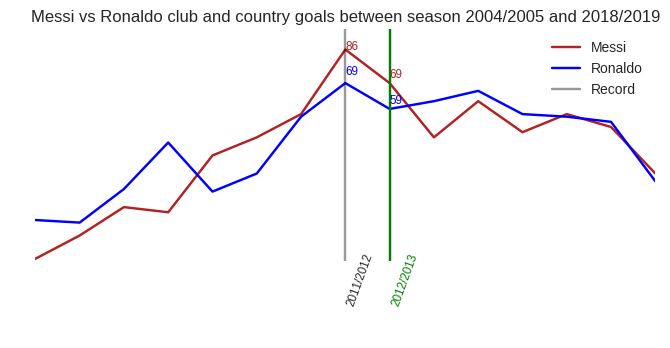

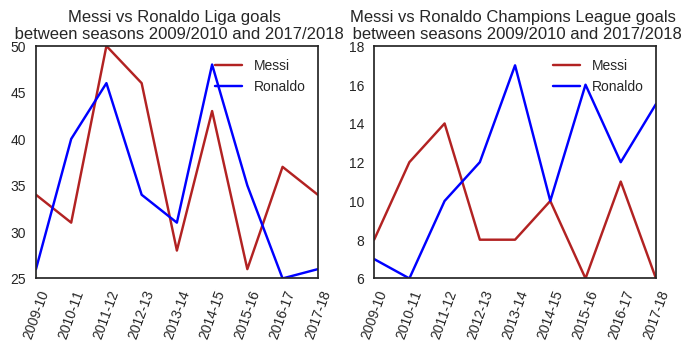

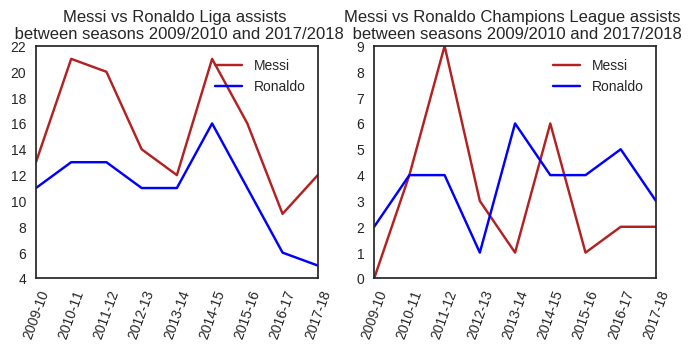

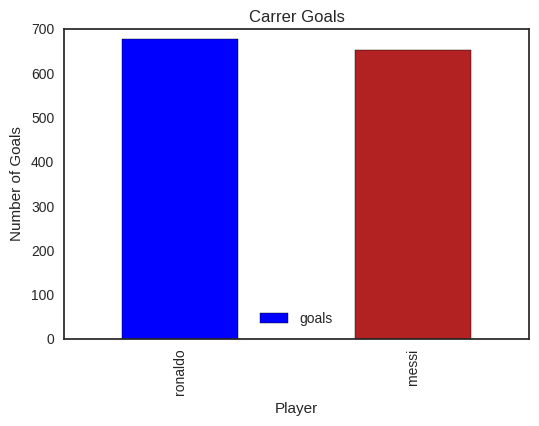

In [103]:
visualize(8)